In [7]:
!pip install transitleastsquares
from astropy.io import fits
from transitleastsquares import (
    transitleastsquares,
    cleaned_array,
    catalog_info,
    transit_mask
    )

import numpy as np

url = 'https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00159951311-s03_tess_v1_lc.fits'
hdu = fits.open(url)
time = hdu[1].data['TIME']
flux = hdu[1].data['PDCSAP_FLUX']  # values with non-zero quality are nan or zero'ed
time, flux = cleaned_array(time, flux)  # remove invalid values such as nan, inf, non, negative
flux = flux / np.median(flux)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


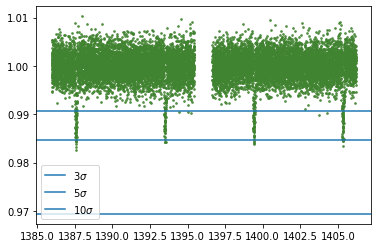

In [8]:
import matplotlib.pyplot as plt

plt.scatter(time, flux, s=3, color='#408330', alpha=0.8)

for i in [3,5,10]: 
    plt.axhline(y=np.mean(flux)-i*np.std(flux), label=str(i)+r'$\sigma$')

plt.legend()
plt.show()

